In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl

In [2]:
class_mapping = {}
with open('dbpedia_csv/classes.txt') as txt_file:
    line_num = 1
    for line in txt_file:
        class_mapping[line_num-1] = line.strip()
        line_num+=1
        
print(class_mapping)

{0: 'Company', 1: 'EducationalInstitution', 2: 'Artist', 3: 'Athlete', 4: 'OfficeHolder', 5: 'MeanOfTransportation', 6: 'Building', 7: 'NaturalPlace', 8: 'Village', 9: 'Animal', 10: 'Plant', 11: 'Album', 12: 'Film', 13: 'WrittenWork'}


In [3]:
def fill_missing(accuracies):
    for item in accuracies.keys():
        for i in range(len(accuracies[item])):
            if np.isnan(accuracies[item][i]):
                if i> len(accuracies[item])-10:
                    accuracies[item][i] = accuracies[item][i-11]
                else:
                    accuracies[item][i] = impute_missing(accuracies, item, i)
                    
def impute_missing(accuracies, item, i):
    if i == 0:
        return(accuracies[item][i+1])
    if i == len(accuracies[item])-1:
        return(accuracies[item][i-3])
    else:
        if np.isnan(accuracies[item][i-1]):
            accuracies[item][i-1] = impute_missing(accuracies,item,i-1)
        if np.isnan(accuracies[item][i+1]):
            accuracies[item][i+1] = impute_missing(accuracies,item,i+1)
        return((accuracies[item][i-1]+accuracies[item][i+1])/2)

# Doc2Vec

In [4]:
name = 'Doc2Vec/Doc2VecNNAccuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
Doc2Vec_accs = accuracies

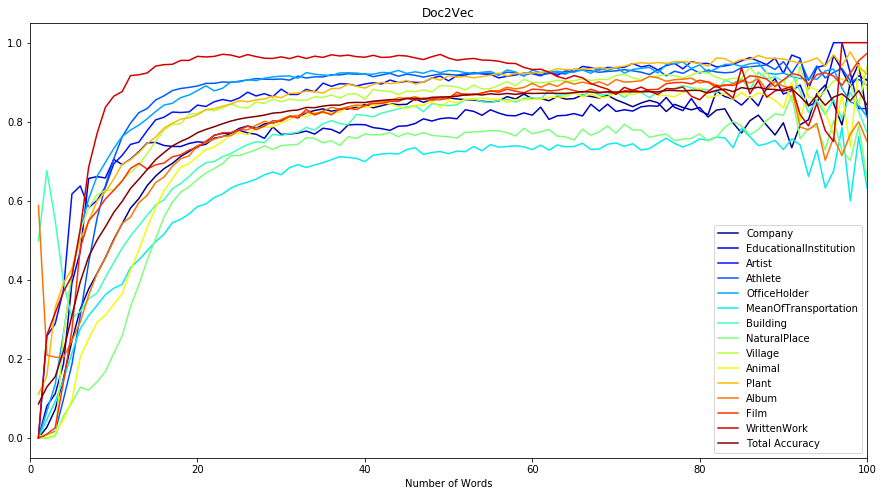

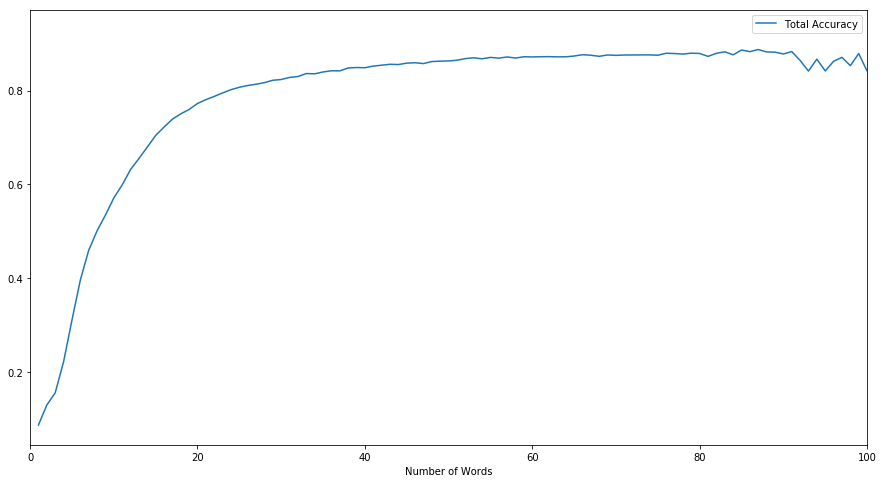

In [5]:
Doc2Vec_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,100), colormap = 'jet')
plt.title('Doc2Vec')
plt.show()
Doc2Vec_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,100))
plt.show()

# Tf Idf

In [6]:
name = 'TfIdf/TfIdf_Accuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
TfIdf_accs = accuracies

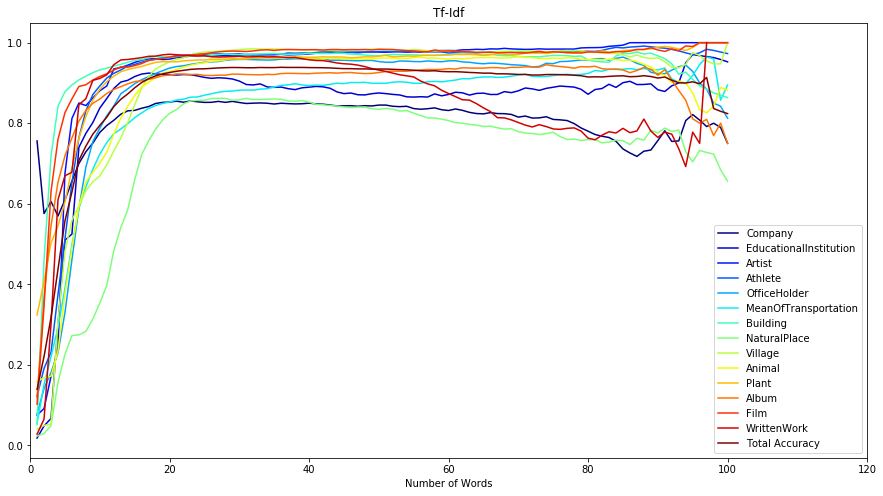

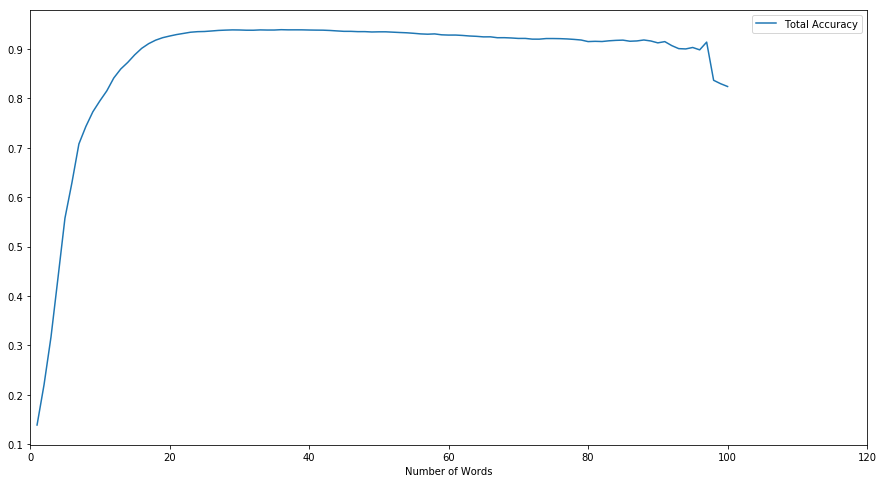

In [7]:
TfIdf_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,120), colormap = 'jet')
plt.title('Tf-Idf')
plt.show()
TfIdf_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,120))
plt.show()

# Universal Sentence Encoder

In [8]:
name = 'UniversalSentenceEncoder/USEaccuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
fill_missing(accuracies)
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
USE_accs = accuracies

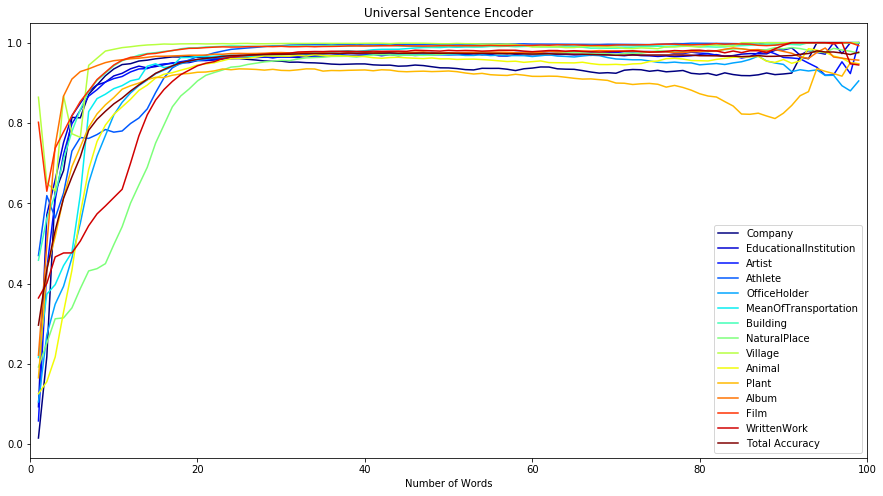

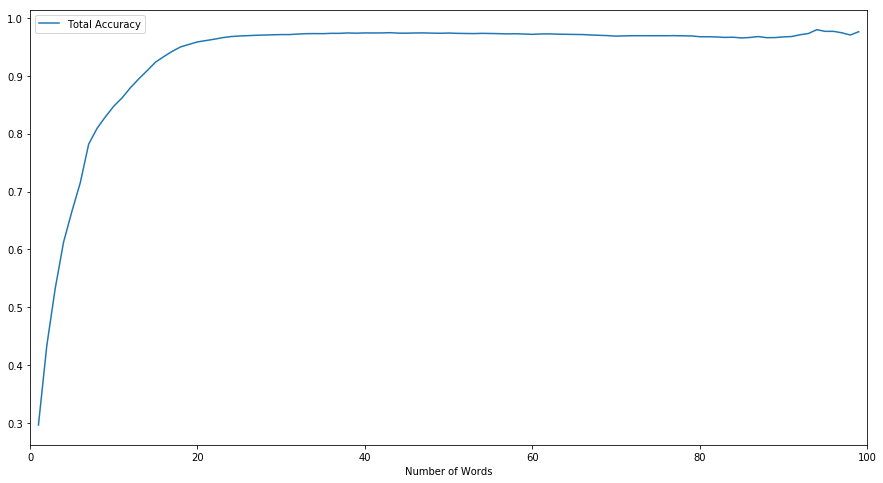

In [9]:
USE_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,100), colormap = 'jet')
plt.title('Universal Sentence Encoder')
plt.show()
USE_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,100))
plt.show()

# Doc2Vec paragraph, FastText word

In [10]:
name = 'Doc2Vec_FastText/Doc2Vec_FastText_Accuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
Doc2Vec_FastText_accs = accuracies

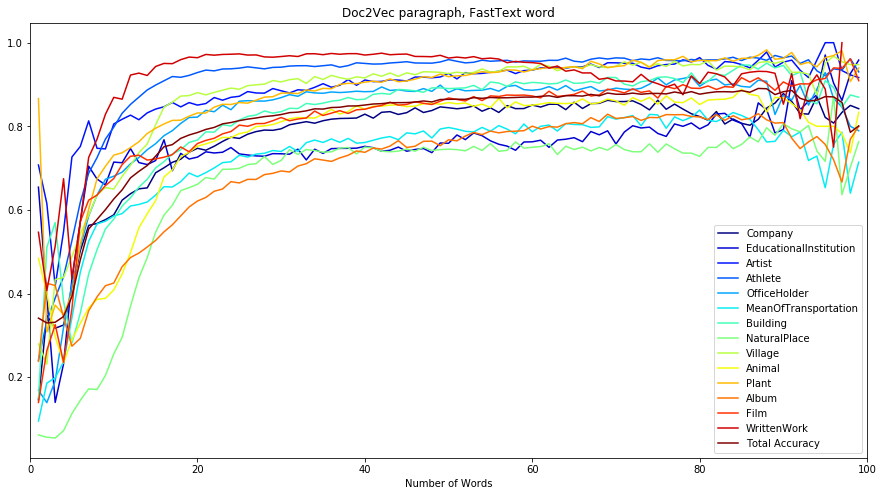

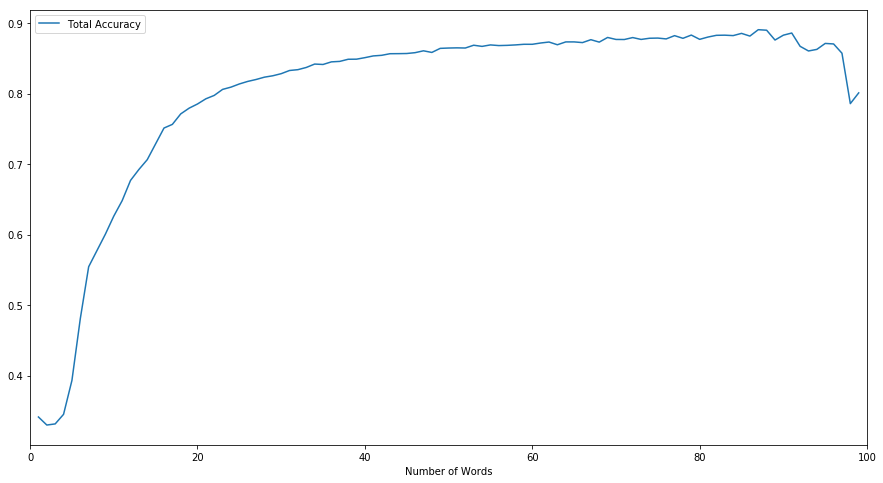

In [11]:
Doc2Vec_FastText_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,100), colormap = 'jet')
plt.title('Doc2Vec paragraph, FastText word')
plt.show()
Doc2Vec_FastText_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,100))
plt.show()

# USE paragraph, Doc2Vec sentence

In [12]:
name = 'USE_Doc2Vec/USEparagraph_Doc2Vecsentence_accuracy'
accs = pkl.load(open(name, 'rb'))
accuracies = pd.DataFrame([accs[key] for key in accs.keys()]).rename(index = class_mapping)
accuracies = accuracies.reindex(sorted(list(accuracies.columns), key = int), axis = 1).transpose()
fill_missing(accuracies)
accuracies['Total Accuracy'] = accuracies.sum(axis=1)/14
accuracies['Number of Words'] = accuracies.index.astype(int)
USE_Doc2Vec_accs = accuracies

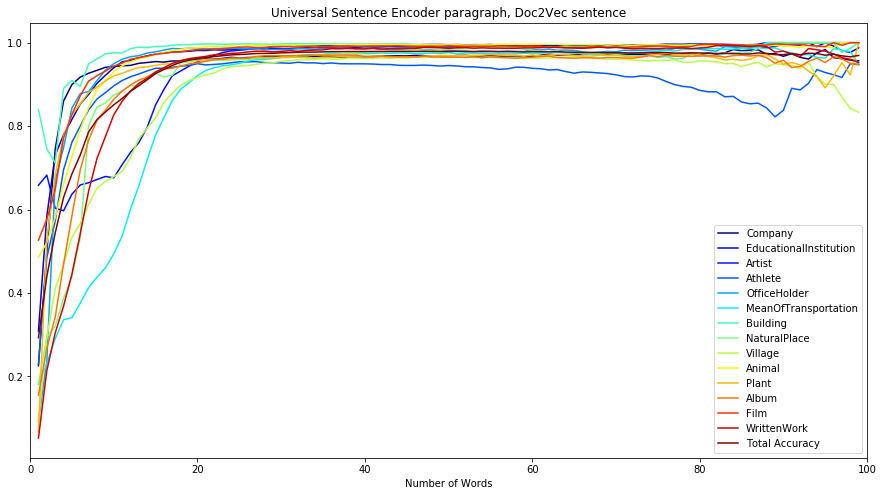

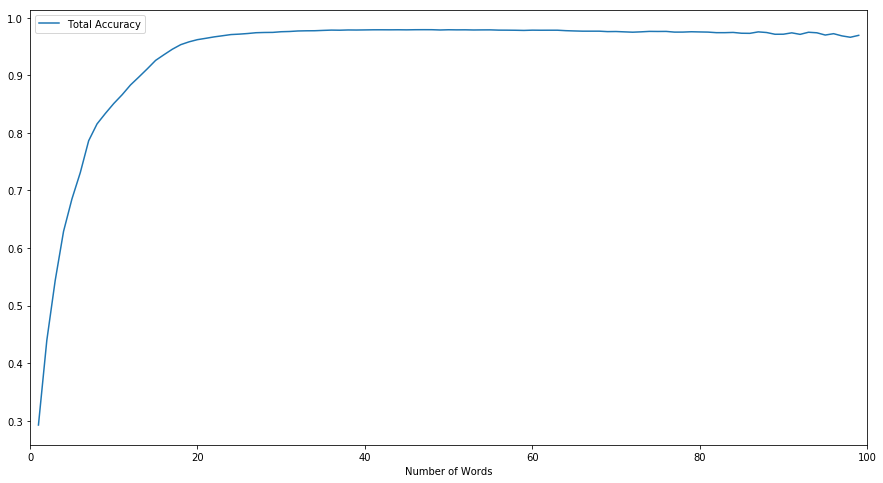

In [13]:
USE_Doc2Vec_accs.plot(x ='Number of Words', figsize = (15,8), xlim=(0,100), colormap = 'jet')
plt.title('Universal Sentence Encoder paragraph, Doc2Vec sentence')
plt.show()
USE_Doc2Vec_accs.plot(x = 'Number of Words', y = 'Total Accuracy', figsize = (15,8), xlim=(0,100))
plt.show()

# Combined

In [14]:
all_accs = pd.DataFrame([Doc2Vec_accs['Total Accuracy'][:100], TfIdf_accs['Total Accuracy'][:100], USE_accs['Total Accuracy'][:100], Doc2Vec_FastText_accs['Total Accuracy'][:100], USE_Doc2Vec_accs['Total Accuracy'][:100]],
                        index = ['Doc2Vec', 'TfIdf', 'USE', 'Doc2Vec_FastText', 'USE_Doc2Vec'])

In [15]:
max_accs = pd.DataFrame([(y,int(x),all_accs.loc[y][x]) for x,y in zip(all_accs.idxmax(axis=1),all_accs.index)], columns=['Method','Word','Accuracy'])
max_accs.set_index('Method', inplace=True)

In [16]:
def highlight_min(s):
    is_min = s == s.min()
    return['background-color:salmon' if v else '' for v in is_min]
def highlight_max(s):
    is_max = s == s.max()
    return['background-color:lightgreen' if v else '' for v in is_max]
max_accs.style.apply(highlight_min).apply(highlight_max)

,Word,Accuracy
Method,,
Doc2Vec,87,0.887392
TfIdf,36,0.938836
USE,94,0.979702
Doc2Vec_FastText,87,0.890567
USE_Doc2Vec,47,0.979256


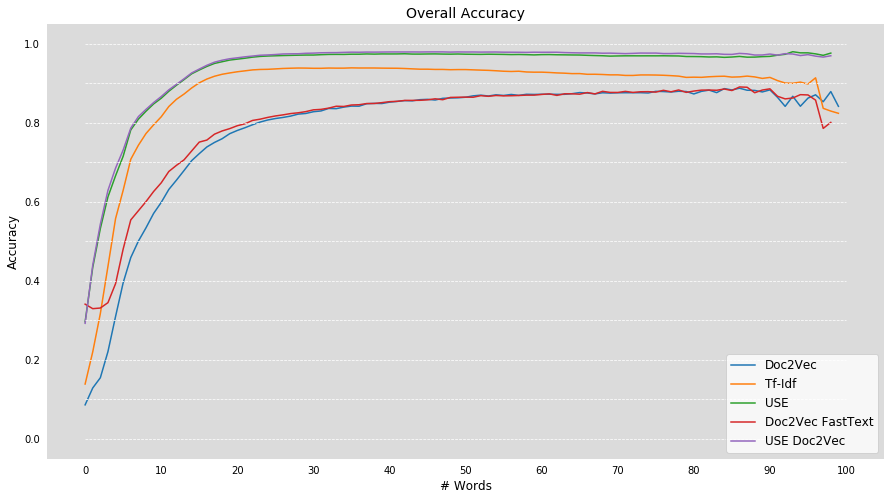

In [17]:
plt.figure(figsize = (15,8))
ax = plt.subplot(111)
plt.plot(all_accs.T)
ax.legend(['Doc2Vec', 'Tf-Idf', 'USE', 'Doc2Vec FastText', 'USE Doc2Vec'], fontsize = 12)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_facecolor('lightgrey')
ax.patch.set_alpha(0.8)
plt.xticks(range(0, 101, 10), [x for x in range(0, 101, 10)], fontsize=10)
plt.yticks(fontsize = 10)
plt.ylabel('Accuracy', fontsize = 12)
plt.xlabel('# Words', fontsize = 12)
for y in np.linspace(0, 1, 11):
    plt.plot(range(0,101), [y] * len(range(0, 101)), "--", lw=.75, color = 'w')
plt.tick_params(axis="both", which="both", bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)
plt.title('Overall Accuracy', fontsize = 14)
plt.show()

In [18]:
def plot_category(category):
    all_category = pd.DataFrame([Doc2Vec_accs[category][:100], TfIdf_accs[category][:100], USE_accs[category][:100], Doc2Vec_FastText_accs[category][:100], USE_Doc2Vec_accs[category][:100]],
                        index = ['Doc2Vec', 'TfIdf', 'USE', 'Doc2Vec_FastText', 'USE_Doc2Vec'])
    plt.figure(figsize = (15,8))
    ax = plt.subplot(111)
    plt.plot(all_category.T)
    ax.legend(['Doc2Vec', 'Tf-Idf', 'USE', 'Doc2Vec FastText', 'USE Doc2Vec'], fontsize = 12)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_facecolor('lightgrey')
    ax.patch.set_alpha(0.8)
    plt.xticks(range(0, 101, 10), [x for x in range(0, 101, 10)], fontsize=10)
    plt.yticks(fontsize = 10)
    plt.ylabel('Accuracy', fontsize = 12)
    plt.xlabel('# Words', fontsize = 12)
    for y in np.linspace(0, 1, 11):
        plt.plot(range(0,101), [y] * len(range(0, 101)), "--", lw=.75, color = 'w')
    plt.tick_params(axis="both", which="both", bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=False)
    plt.title(category, fontsize = 14)
    plt.show()

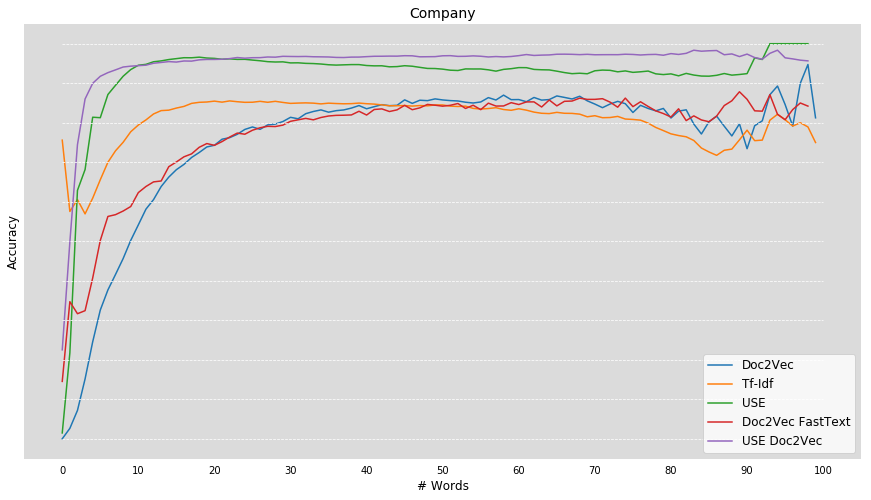

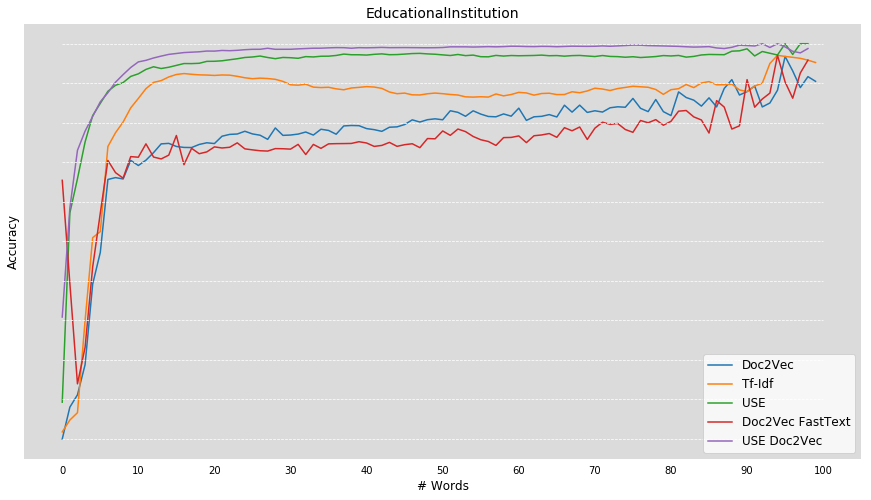

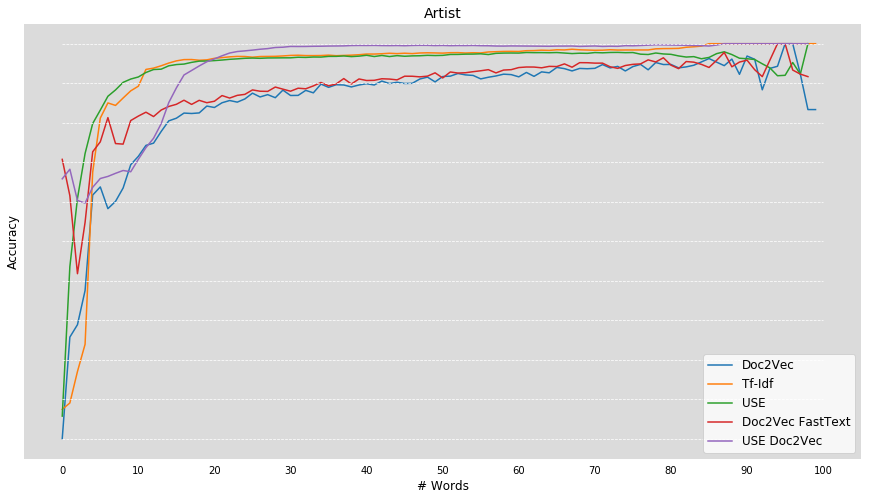

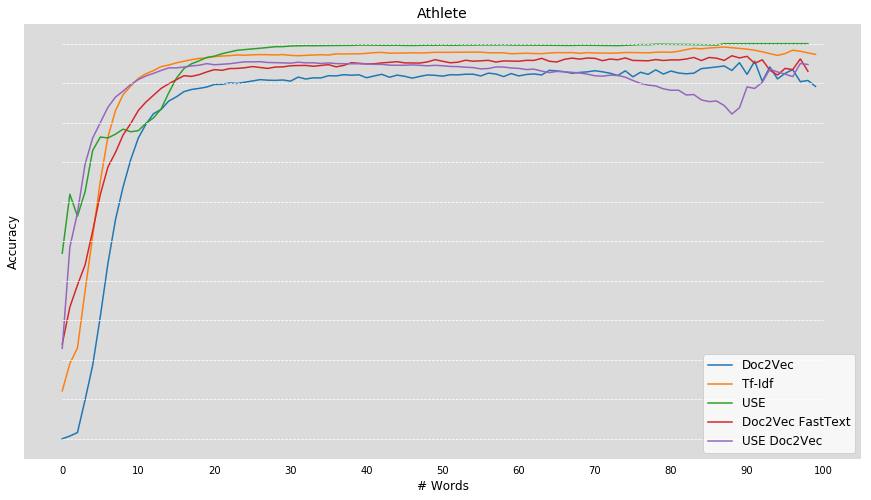

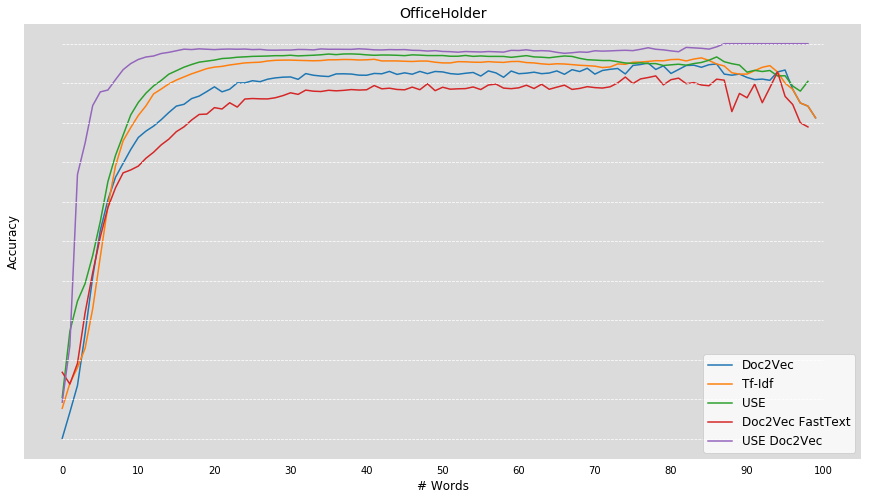

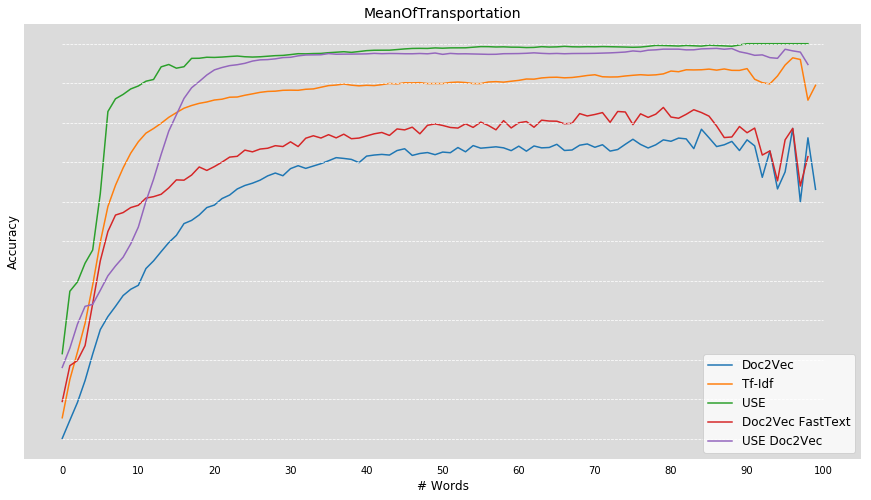

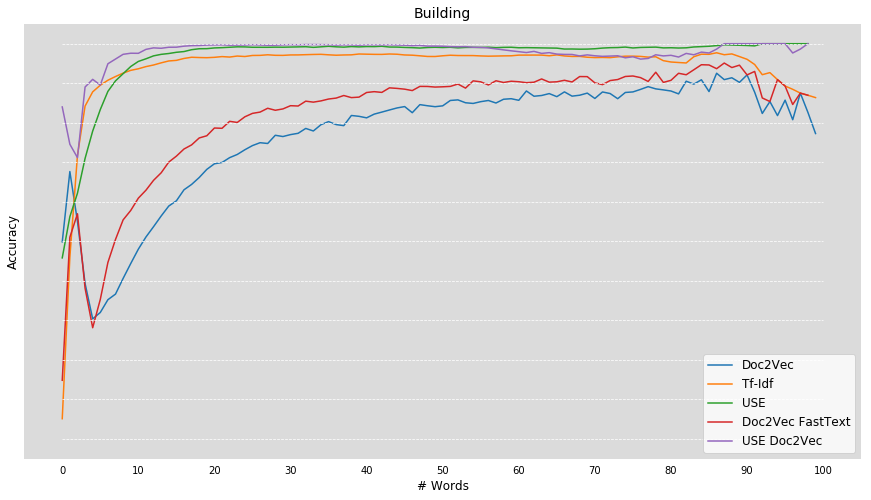

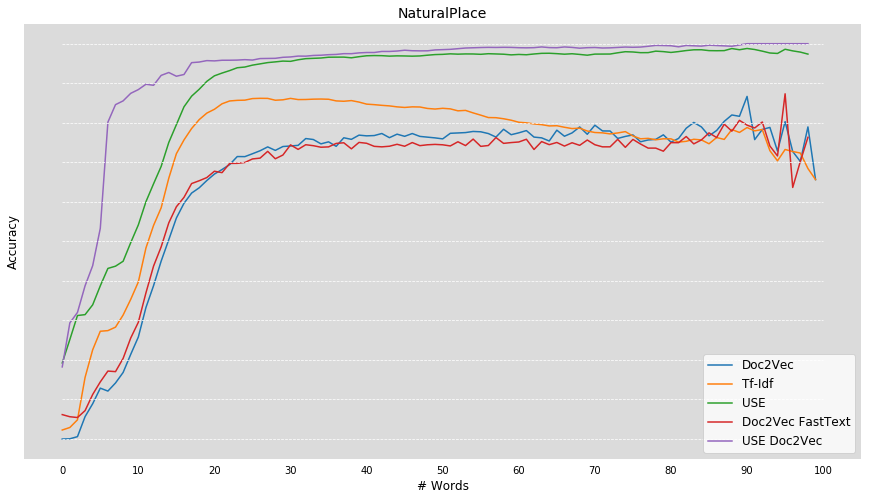

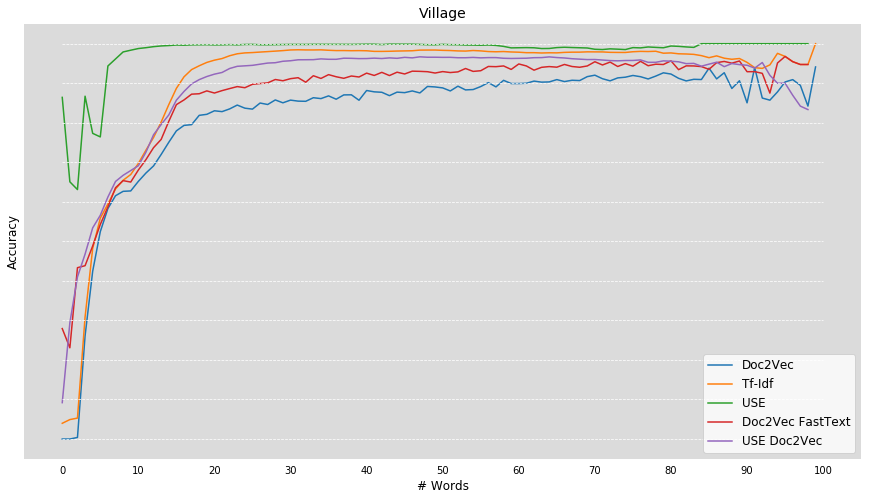

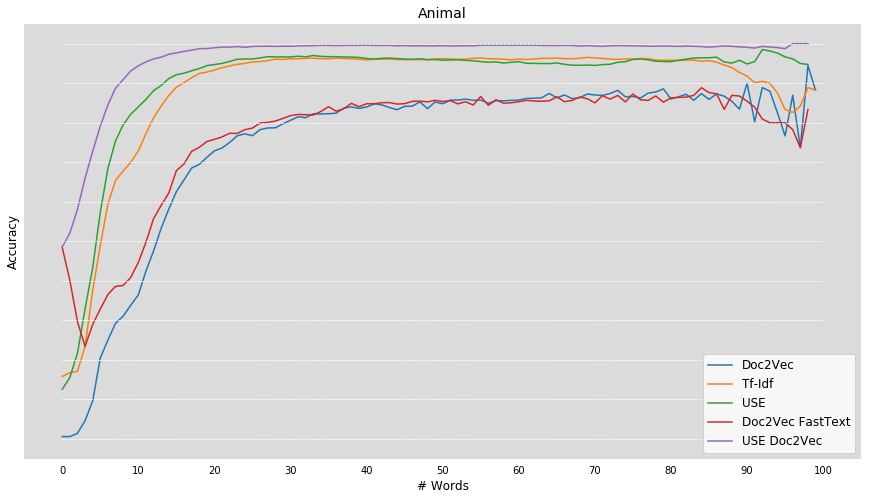

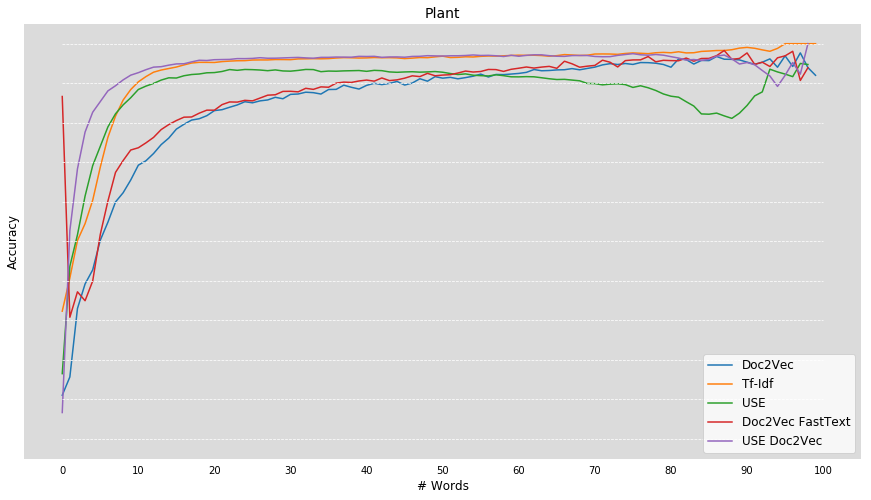

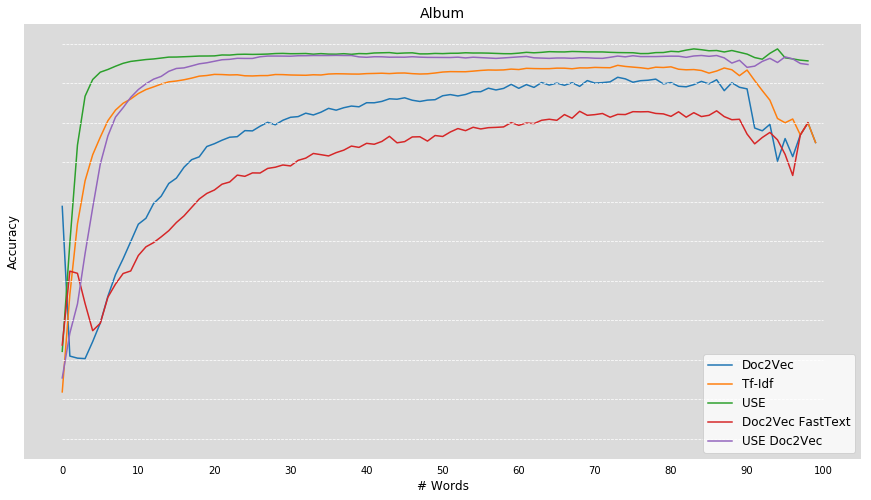

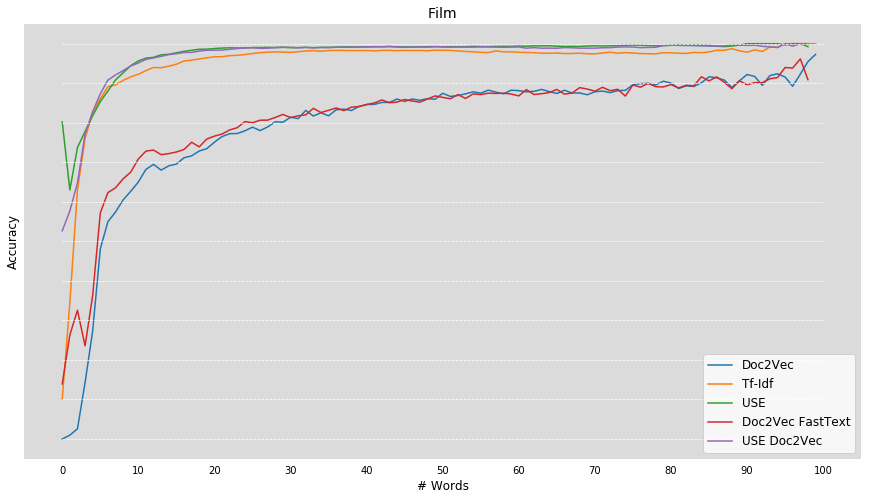

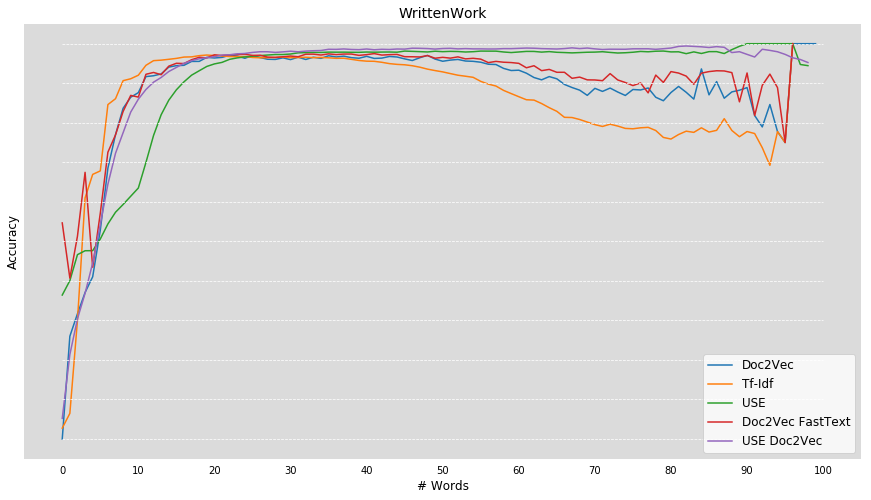

In [19]:
for key in class_mapping.keys():
    plot_category(class_mapping[key])